In [4]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Loding data from text file
def load_from_text():
    data = np.loadtxt("./data/houses.txt", delimiter=",")
    x = data[:,:4]
    y = data[:,4]
    return x, y

In [6]:
# x_tdata is the input variable
# y_tdata is the target
x_tdata, y_tdata = load_from_text()

print(f"x_tdata = {x_tdata}")
print(f"y_tdata = {y_tdata}")

x_label_names = np.array(["Size(sqft)", "Bedrooms", "Floors", "Age"])
y_label_name = "Price (k)"

x_tdata = [[1.652e+03 2.000e+00 1.000e+00 2.100e+01]
 [1.088e+03 2.000e+00 1.000e+00 3.500e+01]
 [1.694e+03 3.000e+00 1.000e+00 1.300e+01]
 [1.073e+03 2.000e+00 1.000e+00 1.000e+02]
 [1.419e+03 3.000e+00 2.000e+00 1.900e+01]
 [2.183e+03 3.000e+00 1.000e+00 5.200e+01]
 [1.396e+03 3.000e+00 2.000e+00 2.340e+01]
 [1.208e+03 2.000e+00 1.000e+00 1.550e+01]
 [8.820e+02 3.000e+00 1.000e+00 4.900e+01]
 [2.030e+03 4.000e+00 2.000e+00 4.500e+01]
 [1.216e+03 2.000e+00 2.000e+00 7.400e+01]
 [2.482e+03 4.000e+00 2.000e+00 1.600e+01]
 [1.660e+03 3.000e+00 2.000e+00 1.900e+01]
 [1.099e+03 2.100e+00 2.100e+00 9.500e+01]
 [1.775e+03 3.000e+00 2.000e+00 2.800e+01]
 [2.030e+03 4.000e+00 2.000e+00 4.500e+01]
 [1.784e+03 4.000e+00 2.000e+00 1.170e+02]
 [1.073e+03 2.000e+00 1.000e+00 1.000e+02]
 [1.953e+03 3.000e+00 2.000e+00 1.600e+01]
 [1.324e+03 2.000e+00 2.000e+00 1.200e+01]
 [1.616e+03 3.000e+00 1.000e+00 1.600e+01]
 [8.160e+02 2.000e+00 1.000e+00 5.800e+01]
 [1.349e+03 3.100e+00 1.000e+00 2.100e+01]
 

In [7]:
# m is the number of training examples
print(f"Shape of the train input data:  {x_tdata.shape}")
print(f"Shape of the train output:      {y_tdata.shape}")

Shape of the train input data:  (75, 4)
Shape of the train output:      (75,)


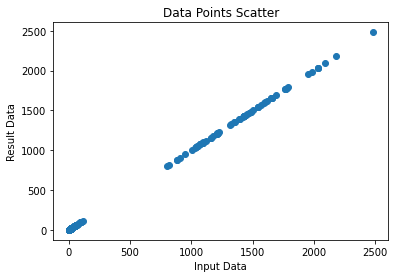

In [8]:
# Plot the data points
plt.scatter(x_tdata, x_tdata)
# Set the title
plt.title("Data Points Scatter")
# Set the y-axis label
plt.ylabel('Result Data')
# Set the x-axis label
plt.xlabel('Input Data')
plt.show()

In [9]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

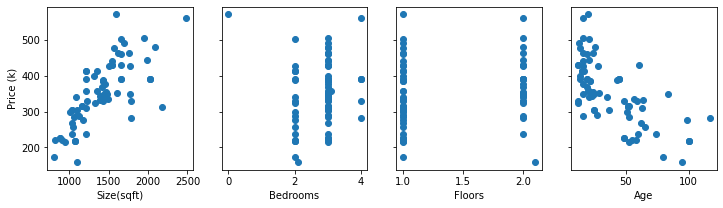

In [10]:
# Plotting our dataset
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(x_tdata[:,i],y_tdata)
    ax[i].set_xlabel(x_label_names[i])
ax[0].set_ylabel(y_label_name)
plt.show()

In [11]:
# Move our linear model to the separate function
def lmodel(x, a, b):
    return np.dot(x, a) + b

In [12]:
# A function that will produce a vector of results based on the input according to the formula
def compute_model(x, a, b):
    # Number of training examples
    length = x.shape[0]
    model_res = np.zeros(length)
    for i in range(length):
        model_res[i] = lmodel(x[i], a, b)
    
    return model_res

In [13]:
# Computing the cost for the current state (a, b) of linear model
def compute_cost(x, y, a, b):
    # number of training examples
    length = x.shape[0]
    
    # Do summing according to cost function formula with the for loop
    cost_sum = 0
    for i in range(length):
        model = lmodel(x[i], a, b)
        cost = (model - y[i]) ** 2
        cost_sum = cost_sum + cost
        
    # Do division according to cost function formula and return result
    total_cost = cost_sum / (2 * length)
    return total_cost

In [14]:
# Computing gradient for the current point (a, b) of the model
def compute_gradient(x, y, a, b):
    # Fguring out the shape of our input parameters (will be same for output)
    m, n = x.shape

    # Setting up initial parameters for partial derivatives
    dda = np.zeros((n,))
    ddb = 0

    # Do summing according to cost function gradient formula with the for loop
    for i in range(m):
        diff = (lmodel(x[i], a, b) - y[i])
        for j in range(n):
            dda[j] = dda[j] + diff * x[i, j]
        ddb = ddb + diff

    # Return respective gradient (as a vector of partial derivatives)
    dda = dda / m
    ddb = ddb / m  

    return dda, ddb

In [15]:
# Normalize our data to make computation faster and more balanced
def std_normalization(x, big_rtn = False):
    # Find the mean for each feature set
    mean = np.mean(x, axis = 0)
    # Find the standart deviation for each feature set
    std = np.std(x, axis = 0)
    # Subtract respective mean values from each feature set
    norm_x = (x - mean) / std

    if big_rtn:
        return (norm_x, mean, std)
    else:
        return norm_x

In [16]:
x_norm, x_mu, x_std = std_normalization(x_tdata, True)

In [17]:
# Gradient descent function. The descent starts from at (a_in, b_in)
def gradient_descent(x, y, a_in, b_in, alpha, num_iters, cost_func, grad_func):
    a = copy.deepcopy(a_in)
    b = b_in

    for i in range(num_iters):
        # Calcuate gradient for our cost function using grad_func
        dda, ddb = grad_func(x, y, a, b)

        # Taking another step of our descent in the space of searched parameters
        a = a - alpha * dda
        b = b - alpha * ddb
    
    # Return computed coefficients
    return a, b

In [18]:
# Let's actually compute our model for normalized data
m, n = x_norm.shape
a_init = np.zeros(n)
b_init = 0
a_norm, b_norm = gradient_descent(x_norm, y_tdata, a_init, b_init, 0.1, 1000, compute_cost, compute_gradient)

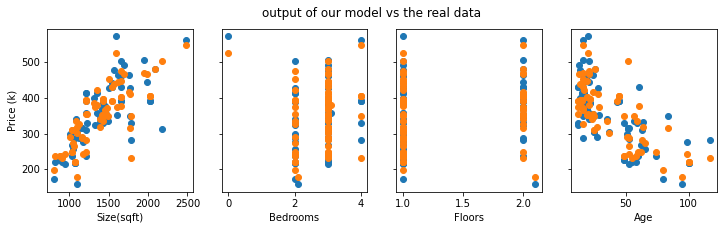

In [19]:
# Evaluating our model: generating array of results for the same data, our model was trained on
y_res = np.zeros(m)
for i in range(m):
    y_res = lmodel(x_norm, a_norm, b_norm)

# Ploting the output of our model vs the real data to see how close we are to the truth
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(x_tdata[:,i],y_tdata, label = 'target')
    ax[i].set_xlabel(x_label_names[i])
    ax[i].scatter(x_tdata[:,i],y_res, label = 'predict')
ax[0].set_ylabel(y_label_name)
fig.suptitle("output of our model vs the real data")
plt.show()

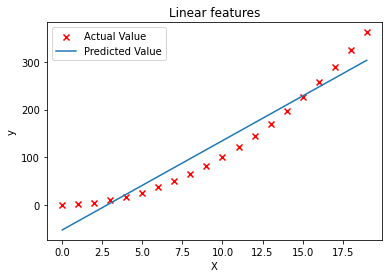

In [27]:
# Trying to fit quadratic data with linear approximation (bad)

# Generating our quadratic "dataset"
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

# Building a linear gradient descent model to fit the data
m,n = X.shape
a_init = np.zeros(n)
b_init = 0
a, b = gradient_descent(X, y, a_init, b_init, 0.01, 1000, compute_cost, compute_gradient)

# Plotting the model vs data to visualize our attempt
plt.scatter(x, y, marker='x', c = 'r', label = 'Actual Value')
plt.title("Linear features")
plt.plot(x, X@a + b, label = 'Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

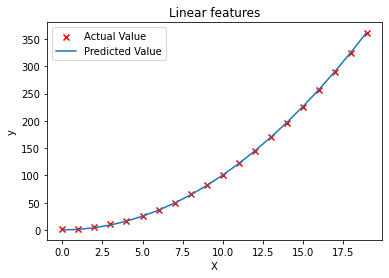

In [29]:
# We now square the input values, so we fit the polynomial right
X = x**2

X = X.reshape(-1, 1)

m,n = X.shape
a_init = np.zeros(n)
b_init = 0
a, b = gradient_descent(X, y, a_init, b_init, 0.00001, 1000, compute_cost, compute_gradient)

plt.scatter(x, y, marker='x', c = 'r', label = 'Actual Value')
plt.title("Linear features")
plt.plot(x, X@a + b, label = 'Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

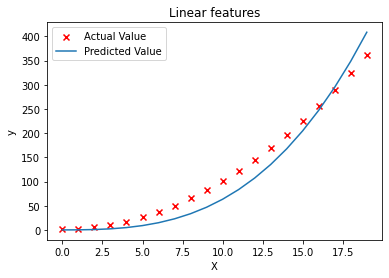

In [28]:
# Trying another polynomial to see the result
X = np.c_[x, x**2, x**3]

m,n = X.shape
a_init = np.zeros(n)
b_init = 0
a, b = gradient_descent(X, y, a_init, b_init, 0.0000001, 1000, compute_cost, compute_gradient)

plt.scatter(x, y, marker='x', c = 'r', label = 'Actual Value')
plt.title("Linear features")
plt.plot(x, X@a + b, label = 'Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

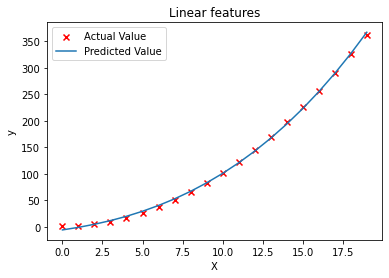

In [30]:
# Let's try to apply scaling to the features to speedup gradient descent
# and get more accurate fit.
X = np.c_[x, x**2, x**3]
X = std_normalization(X)

m,n = X.shape
a_init = np.zeros(n)
b_init = 0
a, b = gradient_descent(X, y, a_init, b_init, 0.1, 1000, compute_cost, compute_gradient)


plt.scatter(x, y, marker='x', c = 'r', label = 'Actual Value')
plt.title("Linear features")
plt.plot(x, X@a + b, label = 'Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

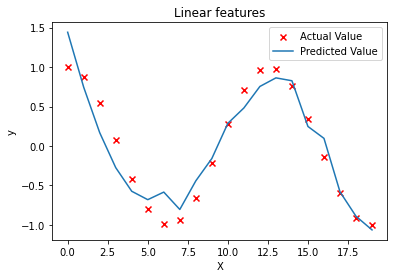

In [31]:
# With feature engineering, even quite complex functions can be modeled:

# Setting the dataset to be a cos function dependency
x = np.arange(0,20,1)
y = np.cos(x/2)

# Choosing our model to be a high order polynomial to fit the complex cos function
X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = std_normalization(X) 

# Do the fitting
m,n = X.shape
a_init = np.zeros(n)
b_init = 0
a, b = gradient_descent(X, y, a_init, b_init, 0.1, 100000, compute_cost, compute_gradient)

# Plot the resultl against scattered data
plt.scatter(x, y, marker='x', c = 'r', label = 'Actual Value')
plt.title("Linear features")
plt.plot(x, X@a + b, label = 'Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()